# 11.0 简介

核心思想：学习如何评估算法生成的模型。创建模型容易，但创建准确的模型很难，因此需要先了解如何评估模型性能。

# 11.1 交叉验证模型

核心概念

使用K折交叉验证（K-Fold Cross-Validation）评估模型性能，避免训练集和测试集划分方式对结果的影响。

In [1]:
# 加载库
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 加载手写数据的数据集
digits = datasets.load_digits()

# 创建特征矩阵
features = digits.data

# 创建目标向量
target = digits.target

# 创建标准化对象
standardizer = StandardScaler()

# 创建逻辑回归对象
logit = LogisticRegression()

# 创建包含数据标准化和逻辑回归的流水线
pipeline = make_pipeline(standardizer, logit)

# 创建k折交叉验证对象
kf = KFold(n_splits=10, shuffle=True,random_state=1)

# 执行k折交叉验证
cv_results = cross_val_score(pipeline, # 流水线
                             features, # 特征矩阵
                             target, #目标向量
                             cv=kf,# 交叉验证方法
                             scoring='accuracy',#损失函数
                             n_jobs=-1)# 使用所有的CPU核
# 计算得分的平均值
cv_results.mean()

0.9699472377405337

关键知识点：

| 概念                      | 说明                                          |
| ----------------------- | ------------------------------------------- |
| **Hold-out验证**          | 简单划分为训练集和测试集，但性能依赖测试集选择                     |
| **K折交叉验证**              | 数据分为k份，轮流用k-1份训练，1份测试，取平均                   |
| **分层K折**                | `StratifiedKFold`确保每折中各类别比例相同               |
| **数据泄露防范**              | 预处理必须基于训练集，用`pipeline`确保每个fold独立处理          |
| **cross\_val\_score参数** | `cv`指定验证方法，`scoring`指定指标，`n_jobs=-1`使用全部CPU |


# 创建一个基准回归模型

核心概念：

使用DummyRegressor创建简单基准模型，作为与复杂模型对比的参照。

In [7]:
# 加载库
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 加载数据
df = pd.read_csv("housing.data.txt", sep='\s+', header=None)

# 创建特征矩阵和目标向量
features = df.iloc[:, :13]
target = df.iloc[:, 13]

# 将数据分为测试集和训练集
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0)

# 创建DummyRegressor对象
dummy = DummyRegressor(strategy='mean')

# 训练回归模型
dummy.fit(features_train,target_train)

# 计算R方得分
dummy.score(features_test,target_test)

-0.001119359203955339

与真实模型对比：

In [8]:
# 加载库
from sklearn.linear_model import LinearRegression

# 训练简单的线性回归模型
ols = LinearRegression()
ols.fit(features_train,target_train)

# 计算R方得分
ols.score(features_test,target_test)

0.6354638433202122

DummyRegression策略：

| 策略         | 说明                      |
| ---------- | ----------------------- |
| `mean`     | 预测训练集目标值的均值             |
| `median`   | 预测训练集目标值的中位数            |
| `constant` | 预测固定常数（需指定`constant`参数） |


# R²得分公式

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

- $R^2$ 越接近1，表示模型解释力越好

# 11.3 创建一个基准分类模型

In [9]:
# 加载库
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 加载数据
iris = load_iris()

# 创建特征矩阵和目标向量
features,target = iris.data,iris.target

# 将数据分为测试集和训练集
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0)

# 创建DummyClassifier
dummy = DummyClassifier(strategy='uniform',random_state=1)

# 训练模型
dummy.fit(features_train,target_train)

# 计算模型的得分
dummy.score(features_test,target_test)

0.42105263157894735

与真实模型对比：

In [10]:
# 加载库
from sklearn.ensemble import RandomForestClassifier

# 创建分类模型
classifier = RandomForestClassifier()

# 训练模型
classifier.fit(features_train,target_train)

# 计算模型的得分
classifier.score(features_test,target_test)

0.9736842105263158

| 策略              | 说明            |
| --------------- | ------------- |
| `stratified`    | 按训练集中类别比例随机预测 |
| `uniform`       | 均匀随机生成预测      |
| `most_frequent` | 总是预测最频繁的类别    |


# 11.4评估二元分类器

核心概念：

使用多种指标评估二元分类器性能，特别是当类别不均衡时。

In [13]:
# 加载数据
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 生成特征矩阵和目标向量
X,y = make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

# 创建逻辑回归对象
logit = LogisticRegression()

# 使用准确率对模型进行交叉验证
cross_val_score(logit,X,y,scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [14]:
# 使用精确率对模型进行交叉验证
cross_val_score(logit,X,y,scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [15]:
# 使用召回率对模型进行交叉验证
cross_val_score(logit,X,y,scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [16]:
# 使用f1分数对模型进行交叉验证
cross_val_score(logit,X,y,scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

| 指标       | 公式                                          | 含义             |
| -------- | ------------------------------------------- | -------------- |
| **准确率**  | $\frac{TP+TN}{TP+TN+FP+FN}$                 | 正确预测的比例        |
| **精确度**  | $\frac{TP}{TP+FP}$                          | 预测为正类中实际为正类的比例 |
| **召回率**  | $\frac{TP}{TP+FN}$                          | 实际正类中被正确预测的比例  |
| **F1分数** | $2 \times \frac{精确度 \times 召回率}{精确度 + 召回率}$ | 精确度和召回率的调和平均   |


还可以直接计算准确率和召回率等指标:

In [17]:
# 加载库
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 创建训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

# 对测试集进行预测
y_hat = logit.fit(X_train,y_train).predict(X_test)

# 计算准确率
accuracy_score(y_test,y_hat)

0.947

混淆矩阵定义
TP（真阳性）：实际为正，预测为正
TN（真阴性）：实际为负，预测为负
FP（假阳性）：实际为负，预测为正（I类错误）
FN（假阴性）：实际为正，预测为负（II类错误）

# 11.5评估二元分类器的阈值

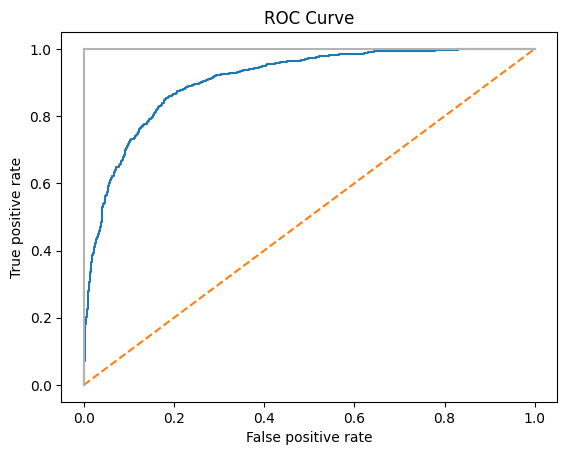

In [18]:
# 加载库
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

# 创建特征矩阵和目标向量
features,target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)
# 将样本划分为测试集和训练集
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=1)

# 创建分类器
logit = LogisticRegression()

# 训练模型
logit.fit(features_train,target_train)

# 获取预测的概率
target_probabilities = logit.predict_proba(features_test)[:,1]

# 计算真阳性和假阳性的概率
false_positive_rate,true_positive_rate,threshold = roc_curve(target_test,target_probabilities)

# 画出ROC曲线
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls= '--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

关键概念：

| 概念        | 说明                           |
| --------- | ---------------------------- |
| **ROC曲线** | 横轴为假阳性率(FPR)，纵轴为真阳性率(TPR)    |
| **AUC**   | ROC曲线下面积，越接近1表示模型越好          |
| **阈值调整**  | 提高阈值→降低FPR但降低TPR；降低阈值→相反     |
| **TPR**   | 真阳性率 = $\frac{真阳性}{真阳性+假阴性}$ |
| **FPR**   | 假阳性率 = $\frac{假阳性}{假阳性+真阴性}$ |


In [19]:
# 获取预测的概率
logit.predict_proba(features_test)[0:1]


array([[0.87240072, 0.12759928]])

In [20]:
# 还可以查看classes_来查看分类
logit.classes_

array([0, 1])

In [21]:
# 计算ROC曲线下的面积：
roc_auc_score(target_test,target_probabilities)

0.9070976347191182

# 11.6 评估多元分类器

核心概念：

评估能预测三个或更多分类的分类器，使用macro/weighted/micro等平均策略。

In [22]:
# 加载库
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 生成特征矩阵和目标向量
features,target  = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

# 创建逻辑回归
logit = LogisticRegression()

# 使用准确率作为指标进行交叉验证
cross_val_score(logit,features,target,scoring='accuracy')

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

平均策略：

| 策略           | 说明                      |
| ------------ | ----------------------- |
| **macro**    | 计算每个分类的得分，取简单平均（各类权重相同） |
| **weighted** | 计算每个分类的得分，按样本数加权平均      |
| **micro**    | 计算每个样本分类组合的得分，然后取平均     |


In [25]:
# 使用macro_f1分数作为指标进行交叉验证
cross_val_score(logit,features,target,scoring='f1_macro')

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

# 11.7 分类器性能的可视化

核心概念：

使用混淆矩阵（Confusion Matrix）可视化分类器性能，通过热力图直观展示预测与真实分类的对比。

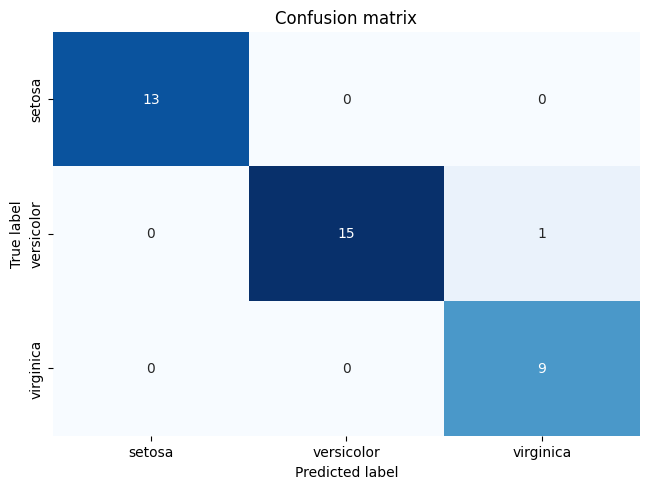

In [28]:
# 加载库
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

#加载数据
iris = datasets.load_iris()

# 创建特征矩阵和目标向量
features,target = iris.data,iris.target

# 创建目标分类的名称列表
class_names = iris.target_names

#创建训练集和测试集
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=1)

#创建逻辑回归分类模型
classifier = LogisticRegression()

# 训练模型并做出预测
target_predicted = classifier.fit(features_train,target_train).predict(features_test)

# 创建混淆矩阵
matrix = confusion_matrix(target_test,target_predicted)

# 创建一个pandas DataFrame
dataframe = pd.DataFrame(matrix,index = class_names,columns=class_names)

# 绘制热力图
sns.heatmap(dataframe,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion matrix'),plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

混淆矩阵解读
行：真实分类
列：预测分类
对角线：正确预测
非对角线：误分类（可看出哪些类别容易混淆）

# 11.8 评估回归模型

核心概念：

使用MSE（均方误差）和R²得分评估回归模型性能。

In [29]:
# 加载库
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 生成特征矩阵和目标向量
features,target = make_regression(n_samples=100,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise = 50,
                                  coef = False,
                                  random_state=1)

# 创建LinearRegresssion对象
ols = LinearRegression()

#使用MSE对线性回归做交叉验证
cross_val_score(ols,features,target,scoring='neg_mean_squared_error')


array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

还可以使用决定系数：

In [30]:
cross_val_score(ols,features,target,scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

| 指标      | 公式                                                      | 说明           |
| ------- | ------------------------------------------------------- | ------------ |
| **MSE** | $\frac{1}{n}\sum(\hat{y}_i - y_i)^2$                    | 均方误差，值越大性能越差 |
| **R²**  | $1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$ | 决定系数，越接近1越好  |


注意事项
scikit-learn中MSE用neg_mean_squared_error（负值），因为scoring默认"越大越好"
MSE对较大误差施加更多惩罚（平方效应）

# 11.9 评估聚类模型

核心概念：

使用轮廓系数（Silhouette Coefficient）评估聚类质量，无需目标标签。

In [31]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成特征矩阵
features,_ = make_blobs(n_samples=1000,
                        n_features=10,
                        centers = 2,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=1)

# 使用KMeans方法对数据聚类，以预测其分类
model = KMeans(n_clusters=2,random_state=1).fit(features)

#获取预测的分类
target_predicted = model.labels_

#评估模型
silhouette_score(features,target_predicted)

C:\Users\24677\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0.8916265564072141

轮廓系数公式：


$$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
$$

- $a_i$：样本 $i$ 与同类所有样本的平均距离（紧密度）
- $b_i$：样本 $i$ 与最近异类所有样本的平均距离（分离度）

**取值范围**：$[-1, 1]$，越接近1表示聚类越好

# 11.10创建自定义评估指标

核心概念：

使用make_scorer将自定义评估函数转换为scikit-learn可用的评分器。

In [32]:
# 加载库
from sklearn.metrics import make_scorer,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 创建特征矩阵和目标向量
features,target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  random_state=1)
# 创建测试集和训练集
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

# 创建自定义指标函数
def customer_metric(target_test,target_predicted):
    # 计算R方得分
    r2 = r2_score(target_test,target_predicted)
    # 返回R方得分
    return r2

# 创建评分函数（评分器），并且定义分数越高代表模型越好
score = make_scorer(customer_metric,greater_is_better=True)

# 创建岭回归（ridge Regression）对象
classifier = Ridge()

# 创建岭回归模型
model = classifier.fit(features_train,target_train)

# 训练自定义评分器
score(model,features_test,target_test)

0.9997906102882058

关键要点
自定义函数需接受(target_test, target_predicted)两个参数
make_scorer参数greater_is_better指定分数方向
可用于封装复杂业务逻辑到评估指标中

In [33]:
# 将结果与sklearn中的r2_score方法进行比较
# 对测试集进行预测
target_predicted = model.predict(features_test)

#计算R方得失
r2_score(target_test,target_predicted)

0.9997906102882058

# 11.11 可视化训练集规模的影响

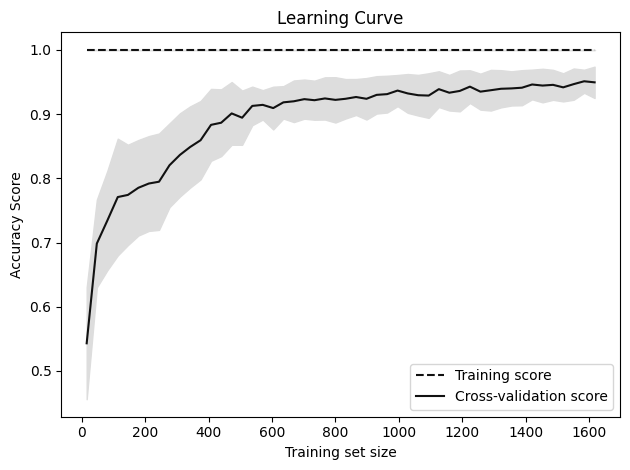

In [34]:
# 加载库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# 加载数据
digits = load_digits()

# 创建特征矩阵和目标向量
features,target = digits.data,digits.target

# 使用交叉验证为不同规模的训练集计算训练和测试得分
train_sizes,train_scores,test_scores = learning_curve(
    #分类器
    RandomForestClassifier(),
    # 特征矩阵
    features,
    # 目标向量
    target,
    # 交叉验证的折数
    cv = 10,
    # 性能指标
    scoring = 'accuracy',
    # 使用所有的CPU
    n_jobs=-1,
    # 50个训练集的规模
    train_sizes = np.linspace(0.01, 1.0, 50)
)

# 计算训练集得分的平均值和标准差
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

# 计算测试集得分的平均值和标准差
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

# 画线
plt.plot(train_sizes,train_mean,'--',color='#111111',label='Training score')
plt.plot(train_sizes,test_mean,color = '#111111',label='Cross-validation score')

# 画带状图
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')

# 创建图
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

| 情况       | 表现            | 建议         |
| -------- | ------------- | ---------- |
| **欠拟合**  | 两条曲线都很低且接近    | 增加模型复杂度或特征 |
| **过拟合**  | 训练分高，验证分低，差距大 | 增加数据或正则化   |
| **理想状态** | 两条曲线收敛且在高处    | 模型和数据都合适   |


# 11.12 生成对评估指标的报告

核心概念：

使用classification_report快速生成包含多个指标的综合评估报告。

In [36]:
# 加载库
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 加载数据
iris = datasets.load_iris()

# 创建特征矩阵
features = iris.data
# 创建目标向量
target = iris.target

#创建目标分类名的列表
class_names = iris.target_names

# 创建训练集和测试集
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=1)

# 创建逻辑回归对象
classifier = LogisticRegression()

# 训练模型并做出预测
model = classifier.fit(features_train,target_train)
target_predicted = model.predict(features_test)

# 生成分类器的性能报告
print(classification_report(target_test,target_predicted,target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



报告列说明
precision：精确度
recall：召回率
f1-score：F1分数
support：该分类的样本数量

# 11.13 可视化超参数值的效果

核心概念：

使用验证曲线（Validation Curve）观察超参数变化对模型性能的影响，辅助超参数调优。

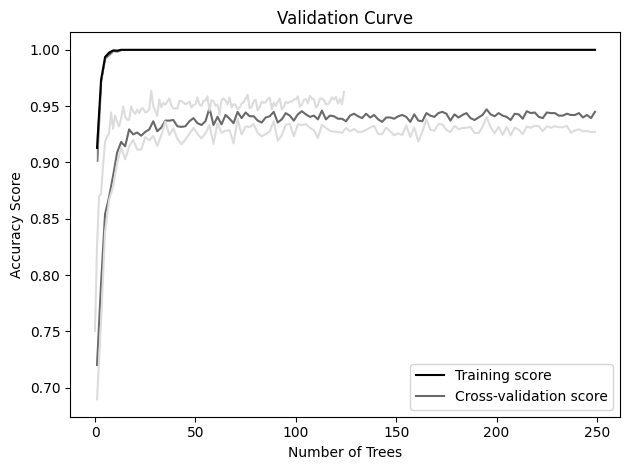

In [38]:
# 加载库
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 加载数据
digits = load_digits()

# 创建特征矩阵和目标向量
features,target = digits.data,digits.target

# 创建参数的变化范围
param_range = np.arange(1,250,2)

# 对区间内的参数值分别计算模型在训练集和测试集上的准确率
train_scores, test_scores = validation_curve(
    # 分类器
    RandomForestClassifier(),
    # 特征矩阵
    features,
    # 目标向量
    target,
    # 要查看的超参数
    param_name='n_estimators',
    #超参数范围的取值
    param_range = param_range,
    # 交叉验证的折数
    cv = 3,
    # 性能指标
    scoring = 'accuracy',
    # 使用所有的CPU核
    n_jobs=-1
)

# 计算模型在训练集上得分的平均值和标准差
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

# 计算模型在测试集上得分的平均值和标准差
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

# 画出模型在训练集和测试集上的准确率的平均值
plt.plot(param_range,train_mean,label='Training score',color = 'black')
plt.plot(param_range,test_mean,label='Cross-validation score',color='dimgrey')

# 画出模型在训练集和测试集上的准确率带状图
plt.fill_between(param_range,train_mean-train_std,train_mean+train_std,color='grey')
plt.plot(param_range,test_mean-test_std,test_mean+test_std,color='gainsboro')

# 画图
plt.title('Validation Curve')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

验证曲线解读：

| 情况         | 表现            | 建议         |
| ---------- | ------------- | ---------- |
| **左侧（值小）** | 训练分低，验证分低     | 欠拟合，增加复杂度  |
| **中部（最佳）** | 训练分高，验证分高，差距小 | 最佳超参数范围    |
| **右侧（值大）** | 训练分高，验证分停滞或下降 | 过拟合或计算资源浪费 |


validation_curve关键参数
param_name：要变化的超参数名称
param_range：超参数取值区间
scoring：评估指标

# 总结：

## 一.本章核心思想：

训练模型容易，评估模型难。模型只有在预测准确时才有实用价值。

## 二.评估方法论框架

### 模型评估的层次结构
- 第一层：数据划分策略
  - 简单划分（train_test_split）
  - K折交叉验证（KFold）
- 第二层：基准对比
  - 基准回归（DummyRegressor）
  - 基准分类（DummyClassifier）
- 第三层：指标评估
  - 分类指标：accuracy/precision/recall/f1
  - 回归指标：MSE/R²
  - 聚类指标：轮廓系数
  - 自定义指标（make_scorer）
- 第四层：阈值与曲线分析
  - ROC曲线 + AUC
  - 混淆矩阵可视化
- 第五层：诊断与优化
  - 学习曲线（数据量影响）
  - 验证曲线（超参数影响）
  - 综合报告（classification_report）

## 三.五大模型类型的评估策略

| 模型类型        | 核心评估工具                         | 关键指标                                 | 特殊注意                                 |
| ----------- | ------------------------------ | ------------------------------------ | ------------------------------------ |
| **分类器（二元）** | `cross_val_score` + ROC曲线      | accuracy, precision, recall, f1, AUC | 类别不均衡时用precision/recall/f1替代accuracy |
| **分类器（多元）** | `cross_val_score`              | accuracy, f1\_macro/f1\_weighted     | 使用macro/weighted/micro平均策略           |
| **回归模型**    | `cross_val_score`              | neg\_mean\_squared\_error, r2        | MSE取负值（scoring约定）                    |
| **聚类模型**    | `silhouette_score`             | 轮廓系数（-1到1）                           | 无监督学习，无目标标签                          |
| **基准模型**    | DummyRegressor/DummyClassifier | 各类strategy                           | 必须作为复杂模型的对比基准                        |


## 四.三大可视化工具对比

| 工具        | 用途          | 横轴        | 纵轴        | 解读要点                 |
| --------- | ----------- | --------- | --------- | -------------------- |
| **混淆矩阵**  | 查看具体分类错误模式  | 预测类别      | 真实类别      | 对角线=正确，非对角线=误分类      |
| **ROC曲线** | 评估二元分类器阈值选择 | FPR（假阳性率） | TPR（真阳性率） | 越靠近左上角越好，AUC接近1最佳    |
| **学习曲线**  | 判断是否需要更多数据  | 训练集大小     | 性能得分      | 两曲线收敛=数据足够，差距大=需更多数据 |
| **验证曲线**  | 选择最佳超参数     | 超参数值      | 性能得分      | 找到训练/验证得分都高的"甜蜜点"    |


## 五.关键设计模式和最佳实践

### 1.流水线模式（防止数据泄露）

In [ ]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
cross_val_score(pipeline, X, y, cv=KFold(n_splits=10))

为什么重要：预处理必须在每个fold内部进行，不能先整体标准化再划分。

### 2.基准对比原则

- 任何复杂模型必须先与基准模型比较
- 基准模型使用strategy='mean'（回归）或'stratified'（分类）
- 如果复杂模型不比基准好很多，说明特征/算法选择有问题

### 3.指标选择矩阵

#### 指标选择决策树
- 数据均衡？
  - 是 → 用 accuracy
  - 否 → 关注什么？
    - 减少误报（如垃圾邮件过滤） → 用 precision
    - 减少漏报（如疾病筛查） → 用 recall
    - 两者平衡 → 用 f1

### 4.交叉验证核心参数

| 参数          | 作用   | 推荐值       |
| ----------- | ---- | --------- |
| `cv`        | 折数   | 5或10      |
| `scoring`   | 评估指标 | 根据任务选择    |
| `n_jobs=-1` | 并行计算 | 总是使用全部CPU |


## 六.本章技术路线图

### 模型评估完整流程
1.  开始评估模型
2.  选择验证策略
    - 数据量大 → Hold-out验证
    - 数据量小 → K折交叉验证（可重复验证提升稳定性）
3.  建立基准模型（Dummy 模型）
4.  训练真实模型
5.  选择评估指标
    - 分类任务 → accuracy/precision/recall/f1/AUC
    - 回归任务 → MSE/R²
    - 聚类任务 → 轮廓系数
    - 特殊需求 → 自定义指标（make_scorer）
6.  可视化诊断
    - 混淆矩阵 → 分析具体错误模式
    - ROC曲线 → 选择最佳分类阈值
    - 学习曲线 → 判断数据量是否充足
    - 验证曲线 → 优化超参数
7.  生成综合报告（如 classification_report）
8.  得出结论并优化模型

## 七.一句话总结每个小节

| 小节           | 核心要点                                     |
| ------------ | ---------------------------------------- |
| 11.1 交叉验证    | 用K折交叉验证获得稳定的性能估计，用Pipeline防止数据泄露         |
| 11.2 基准回归    | DummyRegressor提供"傻瓜基准"，真实模型必须显著超越它       |
| 11.3 基准分类    | DummyClassifier有多种策略，是模型对比的参照系           |
| 11.4 二元分类评估  | 类别不均衡时，accuracy会骗人，要用precision/recall/f1 |
| 11.5 阈值评估    | ROC曲线和AUC帮助选择最佳分类阈值，平衡TPR和FPR            |
| 11.6 多元分类评估  | 用macro/weighted/micro策略将二元指标扩展到多分类       |
| 11.7 混淆矩阵可视化 | 热力图展示具体错误模式，知道模型"错在哪里"                   |
| 11.8 回归评估    | MSE惩罚大误差，R²解释方差比例，两者互补                   |
| 11.9 聚类评估    | 轮廓系数衡量聚类紧密度和分离度，无需目标标签                   |
| 11.10 自定义指标  | make\_scorer让业务指标成为模型优化目标                |
| 11.11 学习曲线   | 判断"增加数据是否有用"，识别欠拟合/过拟合                   |
| 11.12 综合报告   | classification\_report一键生成多指标全面评估        |
| 11.13 验证曲线   | 可视化超参数影响，找到性能和效率的最佳平衡点                   |
